In [2]:
import torch

model = torch.jit.load('d:/Data/Lung/Segmentation/TrainingOutputs/lung_us_segmentation_torchscript.pt')

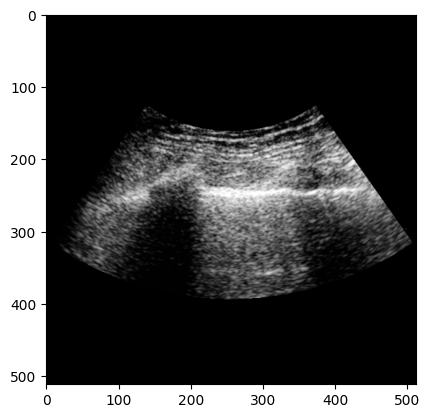

In [46]:
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

test_image_path = 'D:/Data/Lung/images/RawExports/14_merőleges_LUA_001.png'
test_image = Image.open(test_image_path)
plt.imshow(test_image, cmap='gray')

In [17]:
def get_padding_values(input_size):
    height, width = input_size
    difference = width - height
    left, top, right, bottom = 0, 0, 0, 0
    pad_value = difference // 2
    if difference > 0:
        top = pad_value
        bottom = pad_value if difference % 2 == 0 else pad_value + 1
    if difference < 0:
        left = pad_value
        right = pad_value if difference % 2 == 0 else pad_value + 1
    return left, top, right, bottom

In [47]:
from torchvision.transforms import Compose, Resize, Pad, PILToTensor
transform = Compose([
    PILToTensor(),
    Pad(get_padding_values(test_image.size)),
    Resize(512)
])

test_tensor = transform(test_image).type(torch.float).unsqueeze(dim=0)
test_tensor.shape




c:\Users\Robert\anaconda3\envs\pytorch_lab\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 1, 512, 512])

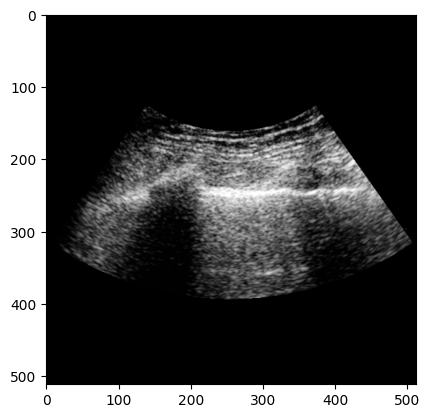

In [48]:
plt.imshow(test_tensor[0,0,:,:], cmap='gray')

In [49]:
pred = model(test_tensor)

RuntimeError: "softmax_kernel_impl" not implemented for 'Long'